## Logistic Regression with Pytorch & Binary Cross Entropy Loss Function with Logits

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### LOAD THE DATA

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Review the data
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [5]:
N,D = data.data.shape
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# PREPROCESSING
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
#Split data
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.33)

In [9]:
#Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #only fit my traing data
x_test = scaler.transform(x_test) # use already fitted scaler to transform

In [10]:
#transform data
x_train = torch.from_numpy(x_train.astype(np.float32)) #Pytorch uses float32
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1)) # Pytorch targets are 2D

x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

### CREATE MODEL WITH LOGITS

In [11]:
model =nn.Linear(D,1)

In [12]:
#Choose Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

### TRAIN MODEL 

In [13]:
n_epochs = 1000
train_losses = []
test_losses = []
for it in range(n_epochs):
  #prevent gradient accumulation
  model.zero_grad()
  
  #forward pass
  outputs = model(x_train)
  loss = criterion(outputs,y_train)
  train_losses.append(loss.item())

  #test loss
  test_outputs = model(x_test)
  test_loss = criterion(test_outputs,y_test)
  test_losses.append(test_loss.item())

  #backward and optimize 
  loss.backward()
  optimizer.step()
  if it % 50 == 0:
    print(f'Epoch {it}/{n_epochs}, Loss: {loss.item():0.4}')


Epoch 0/1000, Loss: 0.5763
Epoch 50/1000, Loss: 0.3906
Epoch 100/1000, Loss: 0.2992
Epoch 150/1000, Loss: 0.2451
Epoch 200/1000, Loss: 0.2091
Epoch 250/1000, Loss: 0.1835
Epoch 300/1000, Loss: 0.1645
Epoch 350/1000, Loss: 0.1498
Epoch 400/1000, Loss: 0.138
Epoch 450/1000, Loss: 0.1285
Epoch 500/1000, Loss: 0.1205
Epoch 550/1000, Loss: 0.1137
Epoch 600/1000, Loss: 0.1079
Epoch 650/1000, Loss: 0.1028
Epoch 700/1000, Loss: 0.09837
Epoch 750/1000, Loss: 0.0944
Epoch 800/1000, Loss: 0.09084
Epoch 850/1000, Loss: 0.08763
Epoch 900/1000, Loss: 0.08472
Epoch 950/1000, Loss: 0.08206


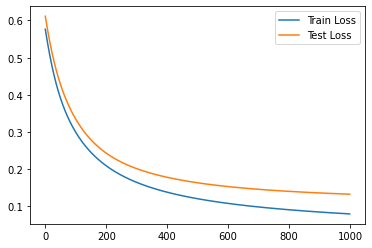

In [14]:
# Plot test error timeline
plt.plot(train_losses,label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.show()


### EVALUATE MODEL 

In [15]:
with torch.no_grad():
  p_train = model(x_train)
  p_train = np.array(p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(x_test)
  p_test = np.array(p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
  print(f'Train accuracy: {train_acc:0.4},Test accuracy: {test_acc:0.4}')

Train accuracy: 0.9816,Test accuracy: 0.9681
